## Data loading


In [ ]:
import pandas as pd
df = pd.read_csv("/content/unicorns till sep 2022.csv")
display(df.head())

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


## Scope and objective



In [ ]:
print(df.info())
print(df.describe(include='all'))

# Based on the columns available, potential analysis objectives are:
# 1. Analyze the distribution of unicorns across different countries.
# 2. Analyze the distribution of unicorns across different industries.
# 3. Explore the relationship between the date joined and company valuation.
# 4. Identify the top countries and industries with the highest total unicorn valuation.
# 5. Analyze trends in unicorn creation over time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB
None
       Company Valuation ($B) Date Joined        Country          City   \
count     1186           1186        1186           1186           1186   
unique    1183            222         695             48            286   
top       Bolt             $1   7/13/2021  United States  San Francisco   
freq         2            271           9            636            168   

       Industry        Investors  
count      1186             1168  
unique

## Data preparation




In [ ]:
df['Valuation ($B)'] = df['Valuation ($B)'].replace({'\$': '', 'B': ''}, regex=True).astype(float)
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
# Since 'Investors' column is not critical for the identified analysis objectives and has missing values,
# I will leave the missing values as they are for now.
display(df.head())
display(df.info())

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1226421593.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Valuation ($B)'] = df['Valuation ($B)'].replace({'\$': '', 'B': ''}, regex=True).astype(float)


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1186 non-null   object        
 1   Valuation ($B)  1186 non-null   float64       
 2   Date Joined     1186 non-null   datetime64[ns]
 3   Country         1186 non-null   object        
 4   City            1186 non-null   object        
 5   Industry        1186 non-null   object        
 6   Investors       1168 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 65.0+ KB


None

## Eda


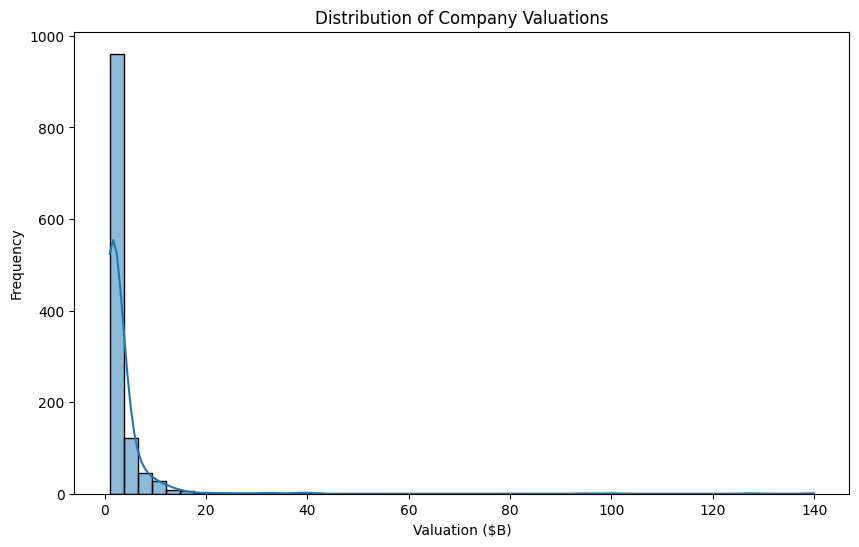

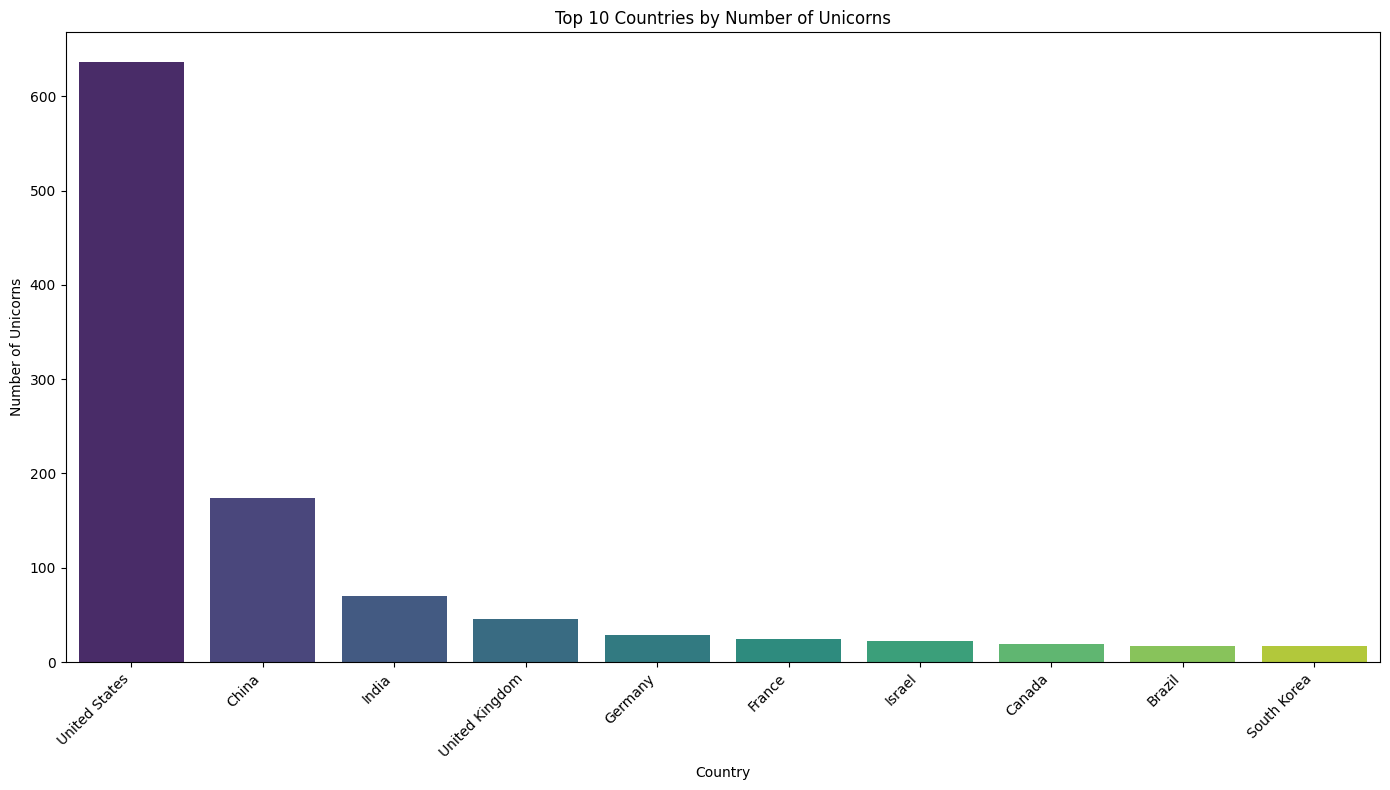

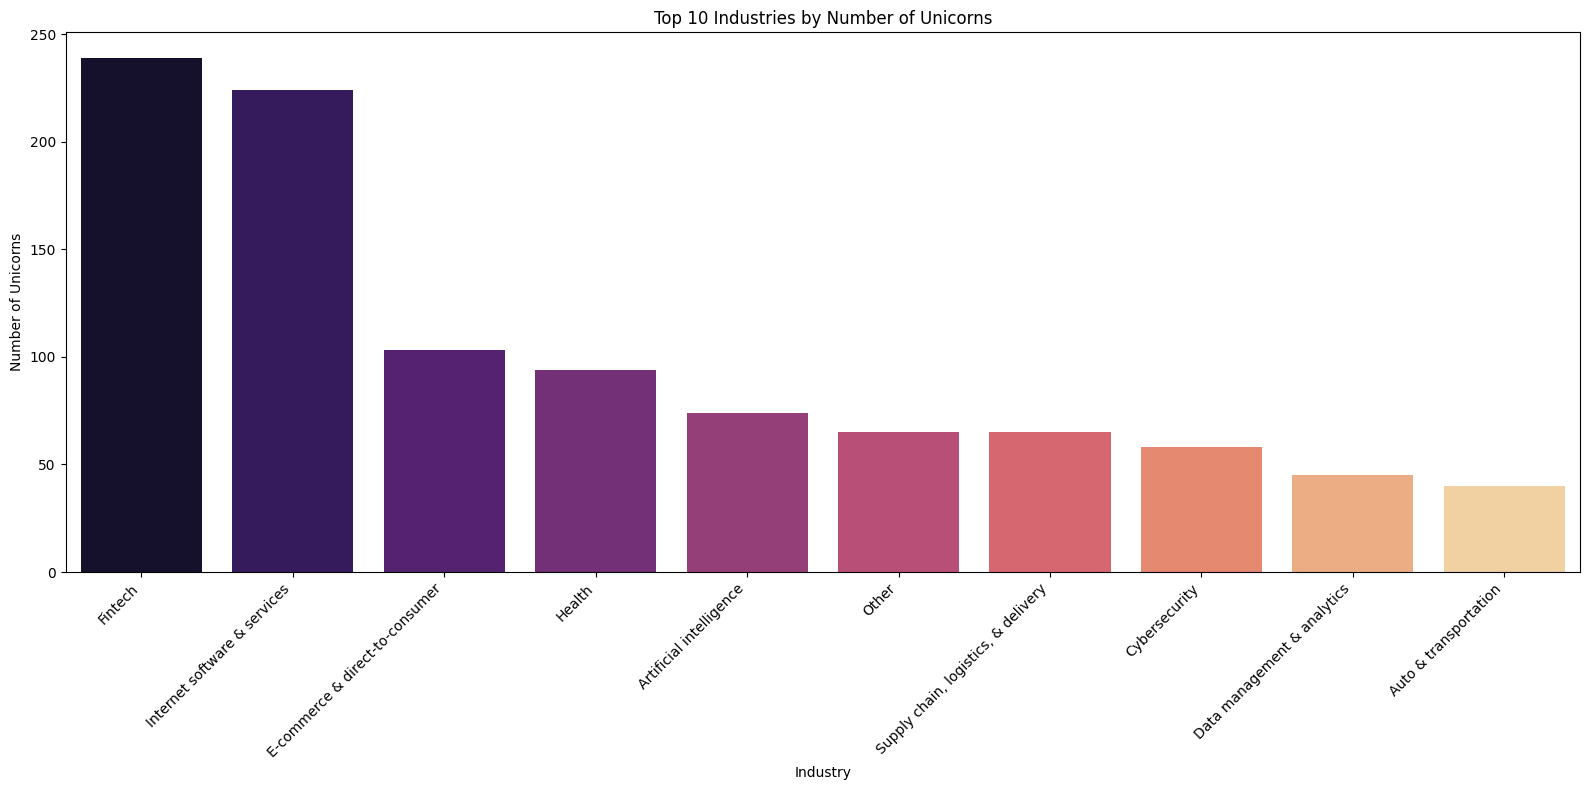

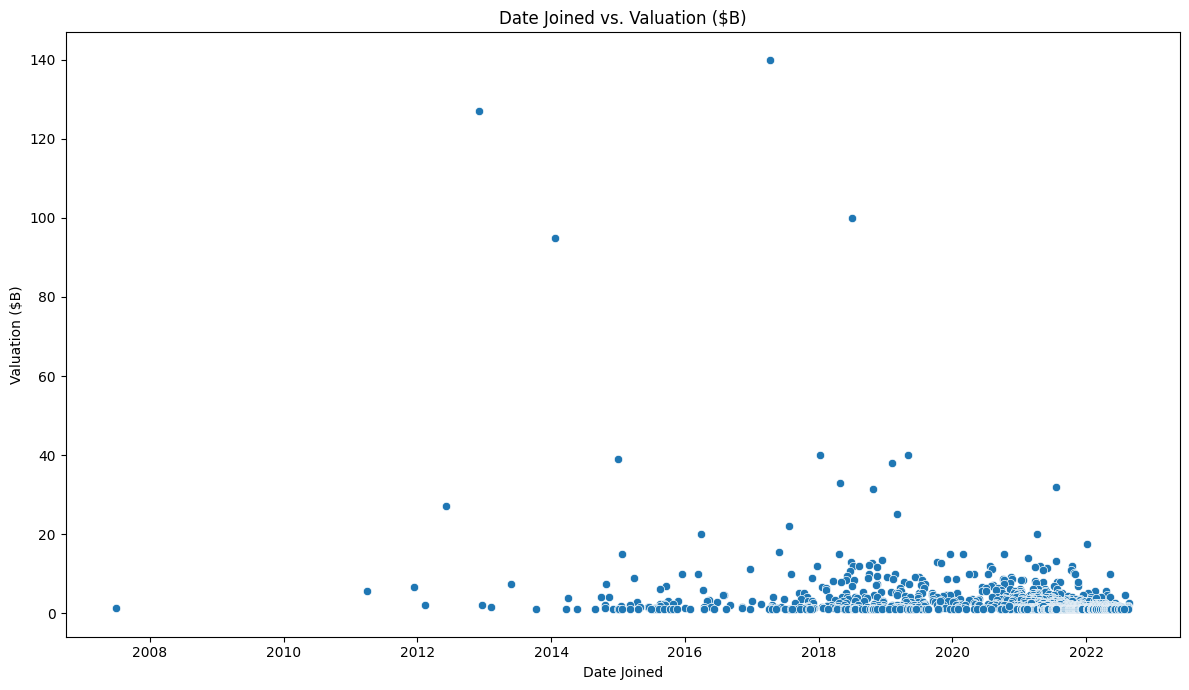

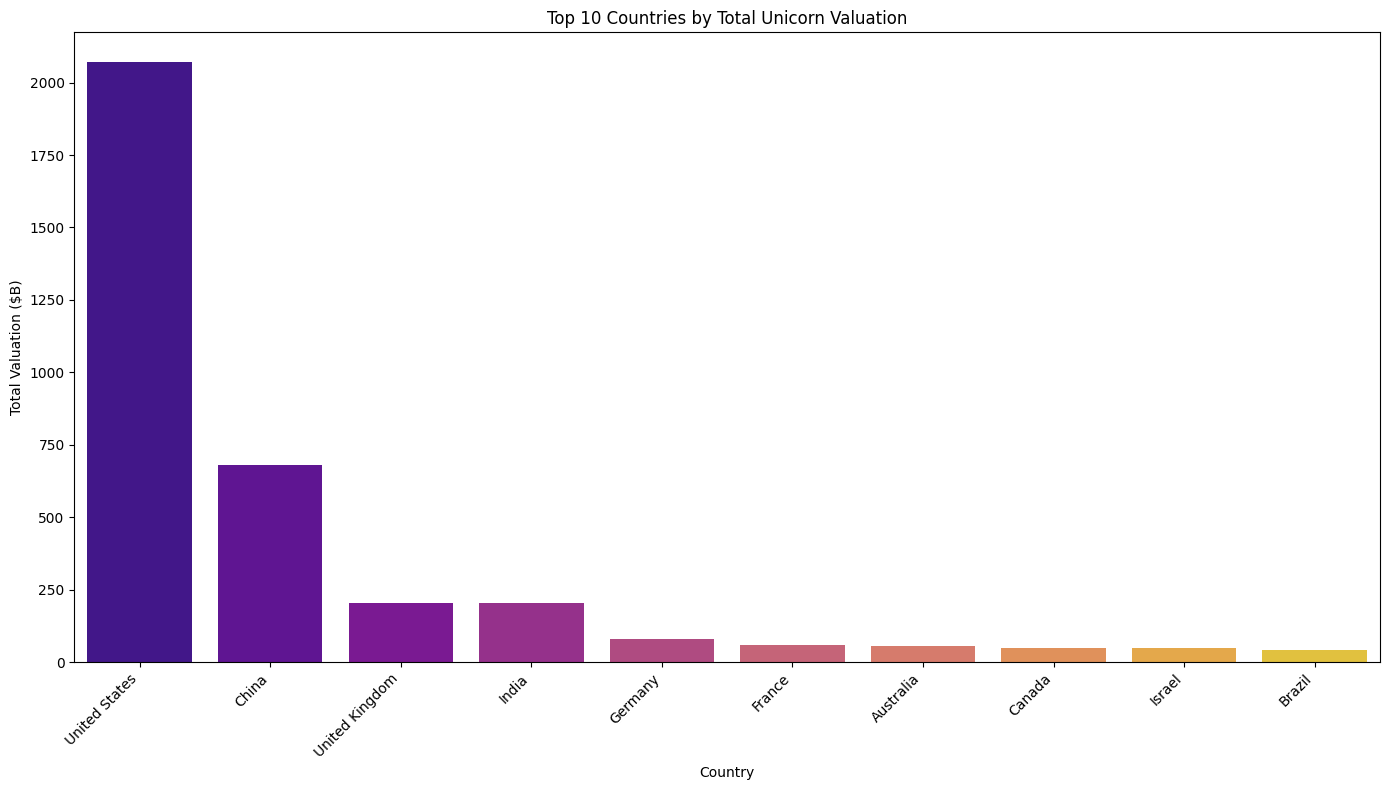

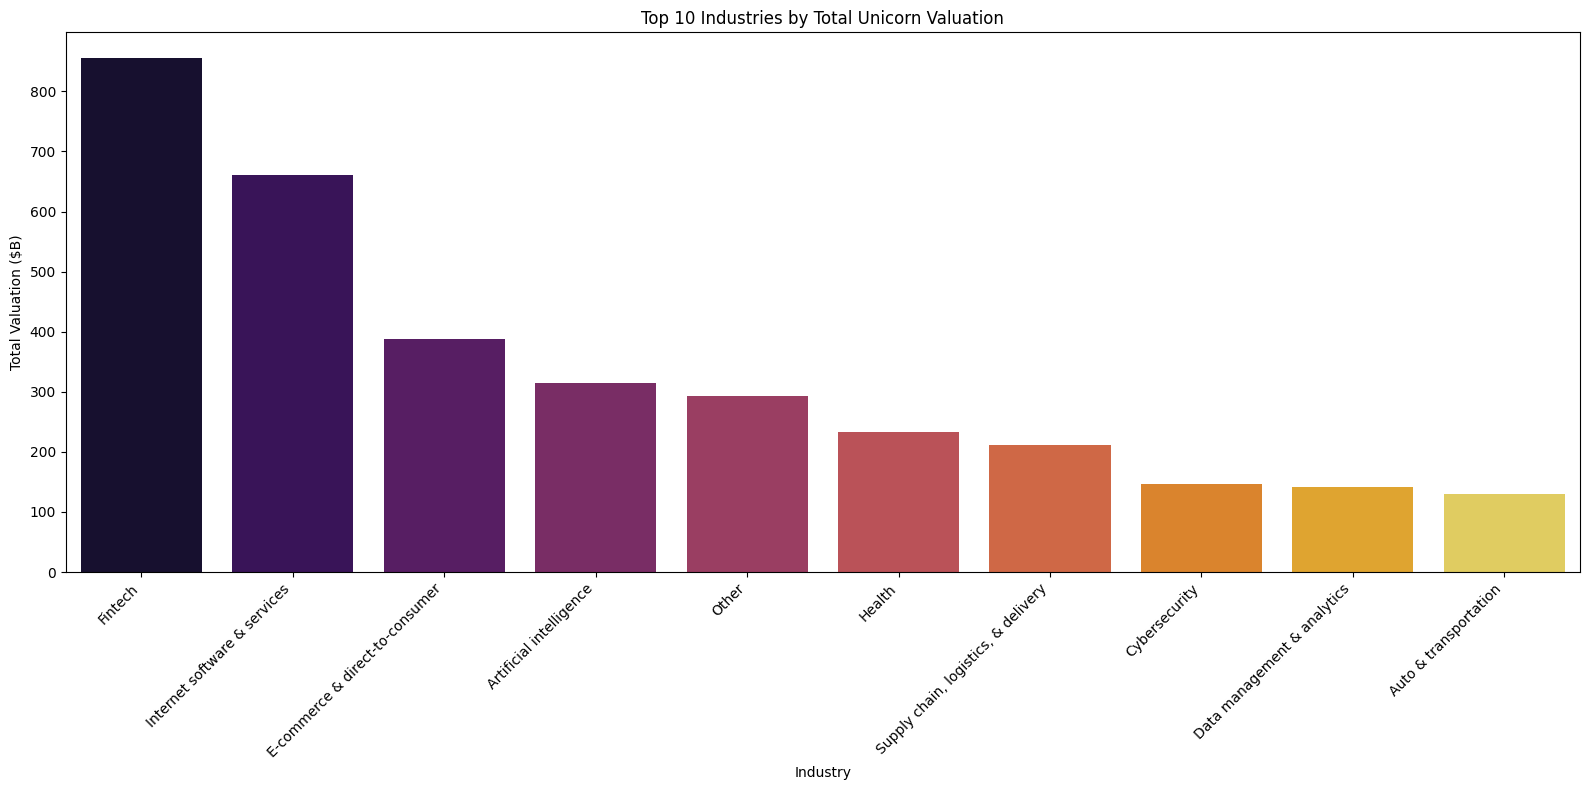

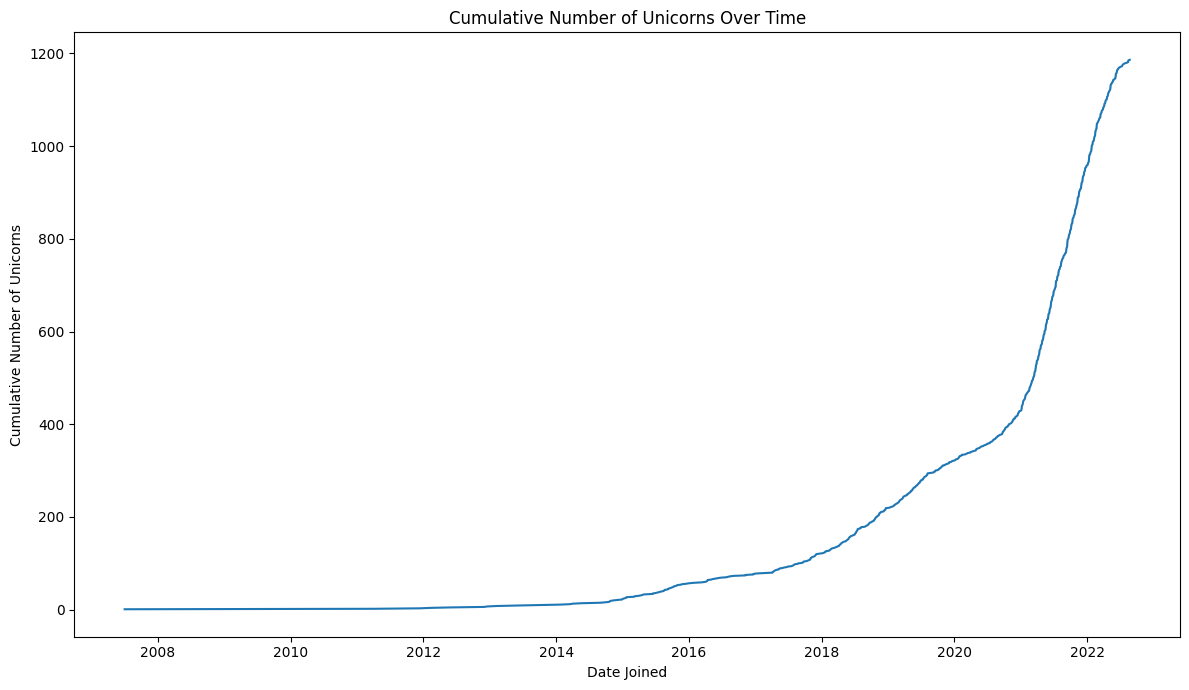

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of 'Valuation ($B)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Valuation ($B)'], bins=50, kde=True)
plt.title('Distribution of Company Valuations')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

# 2. Bar plot of number of unicorns per country (top 10)
plt.figure(figsize=(14, 8)) # Increased figure size
top_countries = df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', hue=top_countries.index, legend=False) # Added hue and legend=False
plt.title('Top 10 Countries by Number of Unicorns')
plt.xlabel('Country')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Bar plot of number of unicorns per industry (top 10)
plt.figure(figsize=(16, 8)) # Increased figure size
top_industries = df['Industry'].value_counts().nlargest(10)
sns.barplot(x=top_industries.index, y=top_industries.values, palette='magma', hue=top_industries.index, legend=False) # Added hue and legend=False
plt.title('Top 10 Industries by Number of Unicorns')
plt.xlabel('Industry')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Scatter plot of 'Date Joined' vs. 'Valuation ($B)'
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['Date Joined'], y=df['Valuation ($B)'])
plt.title('Date Joined vs. Valuation ($B)')
plt.xlabel('Date Joined')
plt.ylabel('Valuation ($B)')
plt.tight_layout()
plt.show()

# 5. Bar plot of total valuation of unicorns per country (top 10)
plt.figure(figsize=(14, 8)) # Increased figure size
total_valuation_country = df.groupby('Country')['Valuation ($B)'].sum().nlargest(10)
sns.barplot(x=total_valuation_country.index, y=total_valuation_country.values, palette='plasma', hue=total_valuation_country.index, legend=False) # Added hue and legend=False
plt.title('Top 10 Countries by Total Unicorn Valuation')
plt.xlabel('Country')
plt.ylabel('Total Valuation ($B)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Bar plot of total valuation of unicorns per industry (top 10)
plt.figure(figsize=(16, 8)) # Increased figure size
total_valuation_industry = df.groupby('Industry')['Valuation ($B)'].sum().nlargest(10)
sns.barplot(x=total_valuation_industry.index, y=total_valuation_industry.values, palette='inferno', hue=total_valuation_industry.index, legend=False) # Added hue and legend=False
plt.title('Top 10 Industries by Total Unicorn Valuation')
plt.xlabel('Industry')
plt.ylabel('Total Valuation ($B)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Time series plot of cumulative number of unicorns over time
plt.figure(figsize=(12, 7))
df_sorted = df.sort_values('Date Joined')
df_sorted['Cumulative Unicorns'] = range(1, len(df_sorted) + 1)
sns.lineplot(x=df_sorted['Date Joined'], y=df_sorted['Cumulative Unicorns'])
plt.title('Cumulative Number of Unicorns Over Time')
plt.xlabel('Date Joined')
plt.ylabel('Cumulative Number of Unicorns')
plt.tight_layout()
plt.show()

## Feature engineering


In [ ]:
df['Year Joined'] = df['Date Joined'].dt.year
df['Month Joined'] = df['Date Joined'].dt.month

# Assuming data collection around late 2022, let's use 2022-12-31 as the fixed date
fixed_date = pd.to_datetime('2022-12-31')
df['Age (Years)'] = (fixed_date - df['Date Joined']).dt.days / 365.25

display(df.head())

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Year Joined,Month Joined,Age (Years)
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4,5.733060
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12,10.080767
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7,4.495551
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1,8.936345
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1,4.977413


In [ ]:
# Check unique values in categorical columns
print("Unique countries:", df['Country'].nunique())
print("Unique industries:", df['Industry'].nunique())
print("Unique cities:", df['City\xa0'].nunique())

# For demonstration, let's one-hot encode 'Country' and 'Industry' as they have a reasonable number of unique values.
# 'City' has too many unique values for simple one-hot encoding.
df = pd.get_dummies(df, columns=['Country', 'Industry'], drop_first=True)

# Normalize 'Valuation ($B)' and 'Age (Years)' using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Valuation ($B)', 'Age (Years)']] = scaler.fit_transform(df[['Valuation ($B)', 'Age (Years)']])

display(df.head())

Unique countries: 48
Unique industries: 34
Unique cities: 286


,Company,Valuation ($B),Date Joined,City,Investors,Year Joined,Month Joined,Age (Years),Country_Australia,Country_Austria,...,"Industry_Sequoia Capital China, ING, Alibaba Entrepreneurs Fund","Industry_Sequoia Capital China, Shunwei Capital Partners, Qualgro","Industry_Sequoia Capital, Thoma Bravo, Softbank","Industry_SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures","Industry_Supply chain, logistics, & delivery","Industry_Temasek, Guggenheim Investments, Qatar Investment Authority","Industry_Tiger Global Management, Tiger Brokers, DCM Ventures",Industry_Travel,"Industry_Vertex Ventures SE Asia, Global Founders Capital, Visa Ventures","Industry_Vision Plus Capital, GSR Ventures, ZhenFund"
0,ByteDance,17.902909,2017-04-07,Beijing,"Sequoia Capital China, SIG Asia Investments, S...",2017,4,1.713477,False,False,...,False,False,False,False,False,False,False,False,False,False
1,SpaceX,16.200971,2012-12-01,Hawthorne,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12,3.948141,False,False,...,False,False,False,False,False,False,False,False,False,False
2,SHEIN,12.666177,2018-07-03,Shenzhen,"Tiger Global Management, Sequoia Capital China...",2018,7,1.077415,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stripe,12.011586,2014-01-23,San Francisco,"Khosla Ventures, LowercaseCapital, capitalG",2014,1,3.359923,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Canva,4.811079,2018-01-08,Surry Hills,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1,1.325085,True,False,...,False,False,False,False,False,False,False,False,False,False


## Model selection




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the target variable and features
# Drop the original date column and 'City' as it wasn't one-hot encoded due to high cardinality
X = df.drop(['Valuation ($B)', 'Date Joined', 'City\xa0', 'Company', 'Investors'], axis=1)
y = df['Valuation ($B)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Select a regression algorithm (Linear Regression as an example)
model = LinearRegression()

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (889, 83)
Shape of X_test: (297, 83)
Shape of y_train: (889,)
Shape of y_test: (297,)


## Model training and evaluation



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.6129320876042614
R-squared (R2) Score: 0.03000937898202949


## Model tuning and optimization



In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
ridge_model = Ridge()

# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter tuning with cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_ridge_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the test set
y_pred_tuned = best_ridge_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model Mean Squared Error (MSE): {mse_tuned}")
print(f"Tuned Model R-squared (R2) Score: {r2_tuned}")

Best hyperparameters: {'alpha': 100}
Tuned Model Mean Squared Error (MSE): 0.5862801186781695
Tuned Model R-squared (R2) Score: 0.0721872326346562


## Deployment



In [ ]:
print("Model Deployment Strategies:")

# 1. Briefly explain what model deployment means
print("\n1. What is Model Deployment?")
print("Model deployment in this context means making the trained machine learning model accessible to make predictions on new, unseen data. This typically involves integrating the model into an application or service that can receive input data and return predictions.")

# 2. Discuss the key considerations
print("\n2. Key Considerations for Deployment:")
print("   - Model Format: The trained model needs to be saved in a format that can be easily loaded and used in the deployment environment (e.g., using pickle, joblib, or more specialized formats like ONNX).")
print("   - Infrastructure Requirements: This includes deciding where the model will run (e.g., on-premise servers, cloud platforms like AWS, Azure, GCP) and the computational resources needed (CPU, memory).")
print("   - Scalability: The deployment infrastructure should be able to handle the expected load and scale up or down based on demand.")
print("   - Latency: For real-time predictions, minimizing the time it takes to get a prediction is crucial.")
print("   - Security: Protecting the model and the data it processes is essential.")
print("   - Monitoring and Maintenance: Mechanisms for monitoring model performance in production and updating the model as needed are important.")

# 3. Describe how Flask or Django could be used
print("\n3. Using Flask or Django for Web Service:")
print("   - Flask and Django are Python web frameworks that can be used to build web applications, including APIs.")
print("   - A common approach is to create a web service endpoint (a URL) that accepts input data (e.g., via a POST request in JSON format).")
print("   - The Flask/Django application would load the trained model.")
print("   - When a request is received, the application extracts the input data, preprocesses it (applying the same scaling and encoding as used during training), passes it to the loaded model for prediction, and returns the prediction as a response (e.g., in JSON format).")
print(f"   - Example with Flask: Define a route '/predict' that handles POST requests. Inside the function for this route, load the model, get data from request.json, preprocess data, model.predict(), return jsonify(prediction).")
print(f"   - Example with Django: Create a Django app, define a URL pattern, and create a view function. The view function would handle the request, load the model, preprocess data, make a prediction, and return an HTTP response with the prediction.")

# 4. Mention other potential deployment options
print("\n4. Other Potential Deployment Options:")
print("   - Cloud-based Machine Learning Platforms: Services like AWS SageMaker, Azure Machine Learning, and Google AI Platform provide managed environments for deploying models, often with built-in scalability, monitoring, and MLOps features.")
print("   - Containerization (Docker) and Orchestration (Kubernetes): Packaging the model and its dependencies in Docker containers allows for consistent deployment across different environments. Kubernetes can manage and scale these containers.")
print("   - Serverless Functions: For infrequent predictions, serverless options like AWS Lambda or Azure Functions can be cost-effective, where you only pay when the function is triggered.")
print("   - Edge Deployment: Deploying models directly on devices (e.g., mobile phones, IoT devices) for offline or low-latency predictions.")

Model Deployment Strategies:

1. What is Model Deployment?
Model deployment in this context means making the trained machine learning model accessible to make predictions on new, unseen data. This typically involves integrating the model into an application or service that can receive input data and return predictions.

2. Key Considerations for Deployment:
   - Model Format: The trained model needs to be saved in a format that can be easily loaded and used in the deployment environment (e.g., using pickle, joblib, or more specialized formats like ONNX).
   - Infrastructure Requirements: This includes deciding where the model will run (e.g., on-premise servers, cloud platforms like AWS, Azure, GCP) and the computational resources needed (CPU, memory).
   - Scalability: The deployment infrastructure should be able to handle the expected load and scale up or down based on demand.
   - Latency: For real-time predictions, minimizing the time it takes to get a prediction is crucial.
   - Se

## Summary:

### Data Analysis Key Findings

*   The dataset contains information on 1186 unicorn companies, including their valuation, date joined, country, city, industry, and investors.
*   The majority of unicorn companies are located in the United States and the most frequent industry is Fintech.
*   The distribution of company valuations is right-skewed, with a few companies having significantly higher valuations.
*   The number of unicorns has shown a cumulative increase over time.
*   The initial linear regression model had a low R-squared score of approximately 0.030, indicating poor performance in explaining the variance in company valuation.
*   Hyperparameter tuning with Ridge regression improved the R-squared score to approximately 0.072, which is still low and suggests the model has limited predictive power with the current features.

### Insights or Next Steps

*   The current features and linear models are not highly effective in predicting unicorn valuation. Further feature engineering, exploring non-linear relationships, or trying more complex models (e.g., tree-based models, neural networks) could potentially improve performance.
*   Investigating the high cardinality of the 'City' and 'Investors' columns and potentially incorporating them through more advanced techniques (e.g., embedding, dimensionality reduction) could provide additional predictive signals.
